In [ ]:
!pip install lifelines

     |████████████████████████████████| 348kB 2.9MB/s 


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,accuracy_score,roc_curve
import time
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
%matplotlib inline

In [ ]:
sepsis = pd.read_csv('/content/drive/My Drive/Insight 2020/Sepsis Detection/24hr_windows_sep_only.csv',index_col = 0)
sepsis.head()

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,index,PatientID_Part,Hours,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Sepsis_At_All
0,2880,p000009 0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.000000,0.000000,27,1,0.0,0.0,0.03,1,0,1
1,2881,p000009 0,1,117.0,99.0,0.0,116.0,97.0,81.0,20.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.000000,0.000000,27,1,0.0,0.0,0.03,2,0,1
2,2882,p000009 0,2,117.6,99.2,0.0,116.4,94.4,77.6,22.0,0.0,-7.0,23.0,0.0,7.15,66.0,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123.0,3.6,0.0,0.0,4.0,0.0,0.0,37.6,12.70,46.4,8.900000,124.000000,64.000000,27,1,0.0,0.0,0.03,3,0,1
3,2883,p000009 0,3,118.2,99.4,0.0,116.8,91.8,74.2,24.0,0.0,-4.0,23.5,0.0,7.13,80.5,96.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.5,2.7,0.0,0.0,3.6,0.0,0.0,31.0,9.65,40.8,3.900000,180.000000,114.000000,27,1,0.0,0.0,0.03,4,0,1
4,2884,p000009 0,4,118.8,99.6,0.0,117.2,89.2,70.8,26.0,0.0,-1.0,24.0,0.0,7.30,52.0,98.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102.0,3.8,0.0,0.0,3.6,0.0,0.0,28.0,9.30,39.8,4.033333,190.666667,115.333333,27,1,0.0,0.0,0.03,5,0,1


In [ ]:
from lifelines import CoxPHFitter
import pickle
loaded_model = pickle.load(open('/content/drive/My Drive/Insight 2020/Sepsis Detection/Cox_Model_v1.sav', 'rb'))

In [ ]:
sepsis = sepsis.sample(frac=1)
sepsis.head()

,index,PatientID_Part,Hours,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Sepsis_At_All
1697101,8185549,p100705 38,13,68.0,96.0,36.7000,94.00000,74.0,64.000000,22.0,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.0,21.0,12.250000,53.0,9.458333,0.000000,0.812500,0.25,106.000000,0.000000,1.916667,0.000000,3.857143,1.1,0.0,38.251389,12.502778,0.0,5.597222,0.0,229.875000,31,0,0.0,1.0,2.41,52,0,1
387431,1830119,p004689 197,23,131.0,97.0,38.3300,150.00000,103.0,87.000000,13.5,0.0,3.00,28.200000,0.400000,7.430000,44.000000,0.0,0.0,12.000000,0.0,8.424000,102.280000,0.552000,0.00,97.960000,0.900000,2.072000,4.180000,4.252000,0.0,0.0,27.857143,8.868000,22.9,14.496000,0.0,455.840000,22,0,0.0,0.0,0.03,224,0,1
1345374,6648630,p017204 112,6,92.0,94.0,37.4725,166.30303,88.0,66.222222,16.0,0.0,2.25,26.884615,0.362609,7.457500,36.250000,0.0,0.0,23.807692,0.0,8.415385,107.961538,0.792308,0.00,136.576923,0.000000,1.903846,2.103846,3.403846,0.0,0.0,35.996154,11.896154,0.0,13.119231,0.0,262.923077,83,1,0.0,0.0,0.02,120,0,1
2384533,13054141,p113618 21,13,116.5,96.5,37.8000,138.00000,108.0,91.000000,29.5,24.0,0.00,0.000000,0.440000,7.422791,37.860465,0.0,0.0,20.263158,0.0,9.415789,111.686047,1.073158,0.00,136.666667,1.622326,2.100000,3.336842,4.157895,0.0,0.0,28.180769,8.830769,0.0,18.707692,0.0,99.500000,71,0,0.0,1.0,69.34,35,0,1
85083,367371,p000939 32,3,84.0,95.0,36.6000,0.00000,103.0,0.000000,26.0,0.0,0.00,19.000000,1.000000,0.000000,0.000000,0.0,0.0,9.000000,0.0,7.600000,84.000000,0.500000,0.00,88.000000,0.000000,1.300000,1.300000,4.000000,0.0,0.0,25.600000,9.400000,76.4,4.000000,0.0,113.920000,77,0,1.0,0.0,86.69,36,0,1


In [ ]:
cph = CoxPHFitter()
cph.fit(sepsis.iloc[:,2:-1],
        duration_col='Hours', 
        event_col='SepsisLabel',
       show_progress=True,step_size=.01)

Iteration 1: norm_delta = 0.38710, step_size = 0.0100, log_lik = -926675.91518, newton_decrement = 4248.18091, seconds_since_start = 2.0
Iteration 2: norm_delta = 0.38277, step_size = 0.0100, log_lik = -926591.37657, newton_decrement = 4158.18833, seconds_since_start = 4.0
Iteration 3: norm_delta = 0.37849, step_size = 0.0100, log_lik = -926508.62880, newton_decrement = 4070.21583, seconds_since_start = 5.9
Iteration 4: norm_delta = 0.37301, step_size = 0.0130, log_lik = -926403.49143, newton_decrement = 3958.59544, seconds_since_start = 7.9
Iteration 5: norm_delta = 0.36603, step_size = 0.0169, log_lik = -926270.82229, newton_decrement = 3817.99767, seconds_since_start = 9.8
Iteration 6: norm_delta = 0.35717, step_size = 0.0220, log_lik = -926104.90393, newton_decrement = 3642.56752, seconds_since_start = 11.8
Iteration 7: norm_delta = 0.34601, step_size = 0.0286, log_lik = -925899.80771, newton_decrement = 3426.35046, seconds_since_start = 13.7
Iteration 8: norm_delta = 0.33209, step

<lifelines.CoxPHFitter: fitted with 2.73146e+06 total observations, 2.65848e+06 right-censored observations>

In [ ]:
dir(cph)

['AIC_',
 'AIC_partial_',
 '_ALLOWED_RESIDUALS',
 '_FAST_MEDIAN_PREDICT',
 '_KNOWN_MODEL',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_batch_mode',
 '_censoring_type',
 '_central_values',
 '_check_values_post_fitting',
 '_check_values_pre_fitting',
 '_choose_gradient_calculator',
 '_class_name',
 '_clusters',
 '_compute_baseline_cumulative_hazard',
 '_compute_baseline_hazard',
 '_compute_baseline_hazards',
 '_compute_baseline_survival',
 '_compute_central_values_of_raw_training_data',
 '_compute_confidence_intervals',
 '_compute_delta_beta',
 '_compute_deviance',
 '_compute_martingale',
 '_compute_p_values',
 '_compute_sandwich_estimator',
 '_

In [ ]:
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 2.73146e+06 total observations, 2.65848e+06 right-censored observations>
             duration col = 'Hours'
                event col = 'SepsisLabel'
      baseline estimation = breslow
   number of observations = 2.73146e+06
number of events observed = 72984
   partial log-likelihood = -922488.95
         time fit was run = 2020-09-29 18:44:25 UTC

---
                   coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                
HR                 0.01       1.01       0.00             0.01             0.01                 1.01                 1.01
O2Sat             -0.01       0.99       0.00            -0.01            -0.01                 0.99                 0.99
Temp               0.03       1.03       0.00             0.02             0.03                 1.02                 1.03
SBP                0.00       1.00       0.00             0.00             0.00                 1.00                 1.00
MAP               -0.01       0.99       0.00            -0.01            -0.00                 0.99                 1.00
DBP               -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
Resp               0.01       1.01       0.00             0.01             0.01                 1.01                 1.01
EtCO2              0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
BaseExcess         0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
HCO3              -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
FiO2               0.23       1.26       0.02             0.20             0.27                 1.22                 1.31
pH                -0.00       1.00       0.00            -0.01             0.00                 0.99                 1.00
PaCO2             -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
SaO2               0.00       1.00       0.00             0.00             0.00                 1.00                 1.00
AST               -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
BUN               -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
Alkalinephos       0.00       1.00       0.00             0.00             0.00                 1.00                 1.00
Calcium           -0.05       0.95       0.00            -0.05            -0.04                 0.95                 0.96
Chloride           0.00       1.00       0.00             0.00             0.00                 1.00                 1.00
Creatinine         0.05       1.05       0.00             0.05             0.06                 1.05                 1.06
Bilirubin_direct   0.01       1.01       0.00            -0.00             0.01                 1.00                 1.01
Glucose            0.00       1.00       0.00             0.00             0.00                 1.00                 1.00
Lactate            0.05       1.05       0.00             0.04             0.05                 1.04                 1.05
Magnesium         -0.18       0.83       0.01            -0.20            -0.17                 0.82                 0.85
Phosphate         -0.01       0.99       0.00            -0.02            -0.00                 0.98                 1.00
Potassium          0.07       1.08       0.01             0.06             0.09                 1.06                 1.09
Bilirubin_total   -0.02       0.98       0.00            -0.02            -0.02                 0.98                 0.98
TroponinI          0.00       1.00       0.00             0.00       

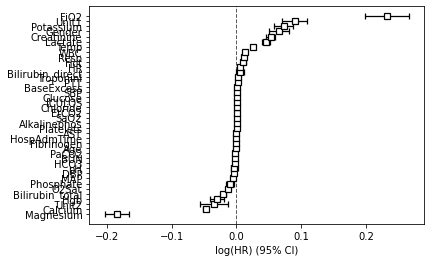

In [ ]:
cph.plot()

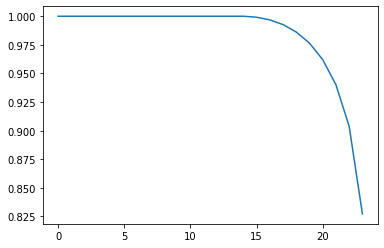

In [ ]:
plt.plot(range(0,24),cph.predict_survival_function(sepsis.iloc[250,1:-2]))

### I need to evluate this base model for all timepoints
* calling the estimator takes way too much time
* maybe subset all labels with 1, and pull an equal amount of zeros
* i need to build up a prediction vector for each a really long prediction and actual vector, as well as a really probablit vector
* then just call the sklearn metric functions

In [ ]:
sepsis.head()

,index,PatientID_Part,Hours,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Sepsis_At_All
1697101,8185549,p100705 38,13,68.0,96.0,36.7000,94.00000,74.0,64.000000,22.0,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.0,21.0,12.250000,53.0,9.458333,0.000000,0.812500,0.25,106.000000,0.000000,1.916667,0.000000,3.857143,1.1,0.0,38.251389,12.502778,0.0,5.597222,0.0,229.875000,31,0,0.0,1.0,2.41,52,0,1
387431,1830119,p004689 197,23,131.0,97.0,38.3300,150.00000,103.0,87.000000,13.5,0.0,3.00,28.200000,0.400000,7.430000,44.000000,0.0,0.0,12.000000,0.0,8.424000,102.280000,0.552000,0.00,97.960000,0.900000,2.072000,4.180000,4.252000,0.0,0.0,27.857143,8.868000,22.9,14.496000,0.0,455.840000,22,0,0.0,0.0,0.03,224,0,1
1345374,6648630,p017204 112,6,92.0,94.0,37.4725,166.30303,88.0,66.222222,16.0,0.0,2.25,26.884615,0.362609,7.457500,36.250000,0.0,0.0,23.807692,0.0,8.415385,107.961538,0.792308,0.00,136.576923,0.000000,1.903846,2.103846,3.403846,0.0,0.0,35.996154,11.896154,0.0,13.119231,0.0,262.923077,83,1,0.0,0.0,0.02,120,0,1
2384533,13054141,p113618 21,13,116.5,96.5,37.8000,138.00000,108.0,91.000000,29.5,24.0,0.00,0.000000,0.440000,7.422791,37.860465,0.0,0.0,20.263158,0.0,9.415789,111.686047,1.073158,0.00,136.666667,1.622326,2.100000,3.336842,4.157895,0.0,0.0,28.180769,8.830769,0.0,18.707692,0.0,99.500000,71,0,0.0,1.0,69.34,35,0,1
85083,367371,p000939 32,3,84.0,95.0,36.6000,0.00000,103.0,0.000000,26.0,0.0,0.00,19.000000,1.000000,0.000000,0.000000,0.0,0.0,9.000000,0.0,7.600000,84.000000,0.500000,0.00,88.000000,0.000000,1.300000,1.300000,4.000000,0.0,0.0,25.600000,9.400000,76.4,4.000000,0.0,113.920000,77,0,1.0,0.0,86.69,36,0,1


In [ ]:
postives = sepsis[sepsis['SepsisLabel'] == 1]
negatives = sepsis[sepsis['SepsisLabel'] == 0].iloc[:postives.shape[0],:]
postives.shape, negatives.shape

((72984, 45), (72984, 45))

In [ ]:
validations = pd.concat([postives,negatives])
del postives,negatives
validations = validations.sample(frac=1)
validations.head()

,index,PatientID_Part,Hours,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Sepsis_At_All
2272766,12233798,p111512 167,14,100.0,100.0,36.9500,99.0,60.0,50.0,13.0,0.0,0.0,0.00,0.00,0.00,0.000000,0.0,110.000000,8.076923,165.230769,8.100000,0.00,0.450000,5.844118,97.000000,2.772644,1.900000,5.561538,4.753846,10.438462,0.00,30.950000,10.083333,64.6,14.950000,298.734375,196.750000,24,1,0.0,1.0,928.86,182,0,1
1059429,5299893,p013764 6,21,88.0,100.0,37.9325,81.0,59.0,45.0,19.0,0.0,2.8,26.00,0.50,7.46,38.833333,79.0,139.000000,9.000000,110.000000,7.900000,119.00,0.600000,0.000000,113.500000,1.680000,2.600000,0.000000,4.000000,0.400000,0.00,29.200000,9.200000,69.6,10.800000,339.000000,111.000000,53,1,1.0,0.0,0.03,36,1,1
2359167,12797463,p112944 22,15,114.0,99.0,36.6500,125.0,100.5,81.5,21.0,24.0,0.0,0.00,0.00,0.00,0.000000,0.0,17.977778,24.703704,53.711111,8.437037,0.00,1.194815,0.000000,178.400000,0.000000,2.837037,3.025926,4.922222,0.473333,0.03,38.259259,12.640741,27.8,21.518519,0.000000,187.592593,48,1,0.0,0.0,0.12,38,0,1
481963,2312323,p005955 73,19,110.0,85.0,35.8600,117.0,87.0,0.0,24.0,0.0,4.0,29.36,1.00,7.46,40.000000,0.0,31.000000,17.080000,153.000000,8.344000,91.28,0.400000,0.000000,114.240000,2.700000,2.336000,2.836000,4.708000,0.500000,0.00,38.460000,13.532000,34.0,13.272000,0.000000,229.560000,56,1,0.0,0.0,0.02,96,0,1
2092897,11026057,p108296 186,1,58.0,99.0,37.6000,152.0,78.0,55.0,13.0,0.0,0.0,0.00,0.35,7.46,32.200000,97.6,55.000000,45.416667,36.000000,7.425000,0.00,1.205000,0.000000,78.333333,1.160000,2.100000,2.758333,3.750000,2.300000,0.00,32.991667,10.016667,31.5,15.941667,213.000000,71.750000,82,1,0.0,1.0,50.96,188,0,1


In [ ]:
##define function that returns predictions,actuals, and probability scores for an observation
def get_predictions_actuals(model,input,threshold=0.1):
  #create actuals
  actuals = [input['SepsisLabel'] for _ in range(24)]
  #get the probas
  probas = cph.predict_survival_function(input[1:-2])
  probas = 1 - probas.values.ravel()
  #get the predictions
  predictions = probas > threshold 
  return actuals,probas.tolist(),predictions.tolist()

In [ ]:
all_predictions = []
all_actuals = []
all_probas = []
for i in range(0,validations.shape[0]):
  if i % 1000 == 0:
    print(i,' th pass at ',time.ctime() )
  acts,probs,preds = get_predictions_actuals(cph,validations.iloc[i,:])
  all_predictions += preds
  all_actuals += acts
  all_probas += probs

0  th pass at  Tue Sep 29 20:16:36 2020
1000  th pass at  Tue Sep 29 20:16:52 2020
2000  th pass at  Tue Sep 29 20:17:08 2020
3000  th pass at  Tue Sep 29 20:17:24 2020
4000  th pass at  Tue Sep 29 20:17:39 2020
5000  th pass at  Tue Sep 29 20:17:55 2020
6000  th pass at  Tue Sep 29 20:18:11 2020
7000  th pass at  Tue Sep 29 20:18:27 2020
8000  th pass at  Tue Sep 29 20:18:43 2020
9000  th pass at  Tue Sep 29 20:18:59 2020
10000  th pass at  Tue Sep 29 20:19:15 2020
11000  th pass at  Tue Sep 29 20:19:31 2020
12000  th pass at  Tue Sep 29 20:19:47 2020
13000  th pass at  Tue Sep 29 20:20:03 2020
14000  th pass at  Tue Sep 29 20:20:18 2020
15000  th pass at  Tue Sep 29 20:20:34 2020
16000  th pass at  Tue Sep 29 20:20:50 2020
17000  th pass at  Tue Sep 29 20:21:06 2020
18000  th pass at  Tue Sep 29 20:21:21 2020
19000  th pass at  Tue Sep 29 20:21:37 2020
20000  th pass at  Tue Sep 29 20:21:53 2020
21000  th pass at  Tue Sep 29 20:22:08 2020
22000  th pass at  Tue Sep 29 20:22:24 2020
2

In [ ]:
len(all_predictions),len(all_actuals),len(all_probas)


(3503232, 3503232, 3503232)

In [ ]:
accuracy_score(all_actuals,all_predictions)

0.5047941443786766

In [ ]:
precision_score(all_actuals,all_predictions)

0.5263666877034999

In [ ]:
recall_score(all_actuals,all_predictions)

0.09570704994702035

In [ ]:
f1_score(all_actuals,all_predictions)

0.16196473125759323

In [ ]:
roc_auc_score(all_actuals,all_predictions)

0.5047941443786766

Text(0, 0.5, 'TPR')

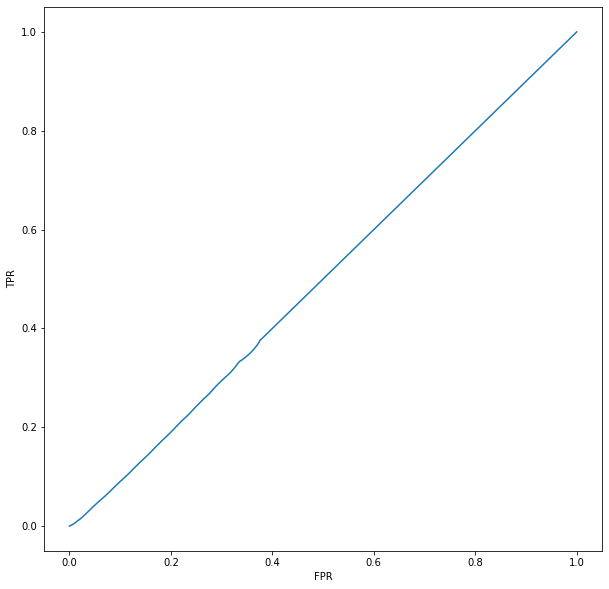

In [ ]:
fpr, tpr, thresholds = roc_curve(all_actuals, all_probas)
plt.figure(figsize=(10,10))
plt.plot(tpr,fpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

In [ ]:
cox_predictions = pd.DataFrame()
cox_predictions['Actuals'] = all_actuals
cox_predictions['Predictions'] = all_predictions
cox_predictions['Probs'] = all_probas
cox_predictions.to_csv('/content/drive/My Drive/Insight 2020/Sepsis Detection/Cox_predictions.csv')